## 1. Import Libraries and Custom Module
This block imports essential libraries for data analysis and visualization (pandas, matplotlib). It also sets up the path to import a custom TechnicalIndicators class from the talib_analysis script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../scripts')
from talib_analysis import TechnicalIndicators


## 2. Load and Prepare Stock Data
This block loads Apple's historical stock data from a CSV file. It handles file errors, converts the date column to datetime, sorts the data by date, checks for missing values, and drops any rows with missing data to ensure clean analysis.

In [2]:
try:
    # Load stock price dataset
    stock_df = pd.read_csv('../../data/yfinance_data/AMZN_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)
# Convert date column to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

# Sort by date for consistency
stock_df.sort_values(by='Date', inplace=True)

# Check for missing values
print(stock_df.isnull().sum())
stock_df.dropna(inplace=True)  # Drop missing values if necessary

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


## 3. Compute Technical Indicators
Here, the custom TechnicalIndicators class is instantiated with the stock DataFrame. The add_all() method computes and adds several technical indicators (such as SMA, EMA, RSI, and MACD) to the DataFrame.

In [3]:
ti = TechnicalIndicators(stock_df, price_col='Close')
ti.add_all()

## 4. Plot Stock Price with Moving Averages
This block creates a line plot of the closing price along with the 20-day Simple Moving Average (SMA) and Exponential Moving Average (EMA). It helps visualize price trends and smoothing effects of moving averages.

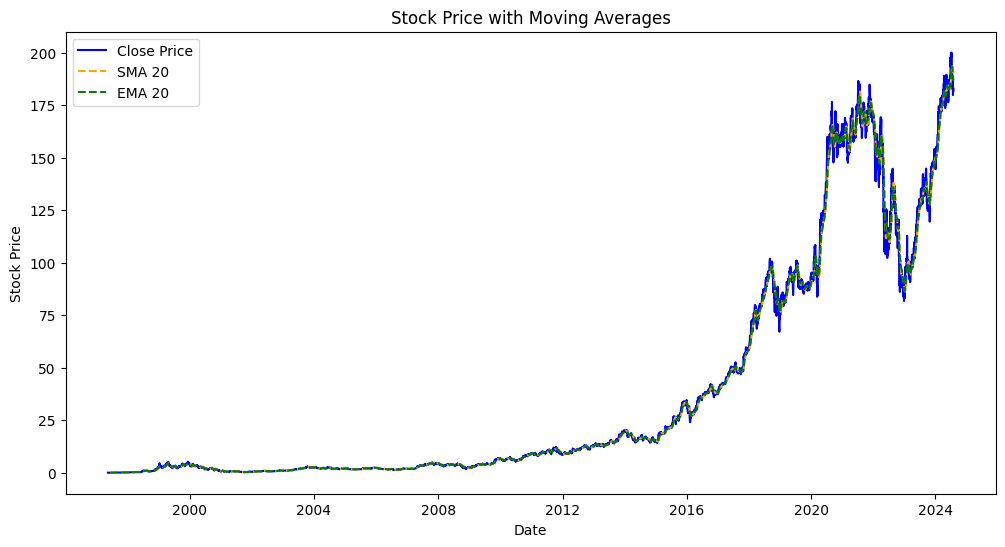

In [4]:
plt.figure(figsize=(12,6))
plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price', color='blue')
plt.plot(stock_df['Date'], stock_df['SMA_20'], label='SMA 20', linestyle='dashed', color='orange')
plt.plot(stock_df['Date'], stock_df['EMA_20'], label='EMA 20', linestyle='dashed', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

## 5. Plot MACD Indicator
This block visualizes the MACD (Moving Average Convergence Divergence) indicator. It plots the MACD line, the signal line, and the MACD histogram as a bar chart, providing insight into momentum and potential buy/sell signals.

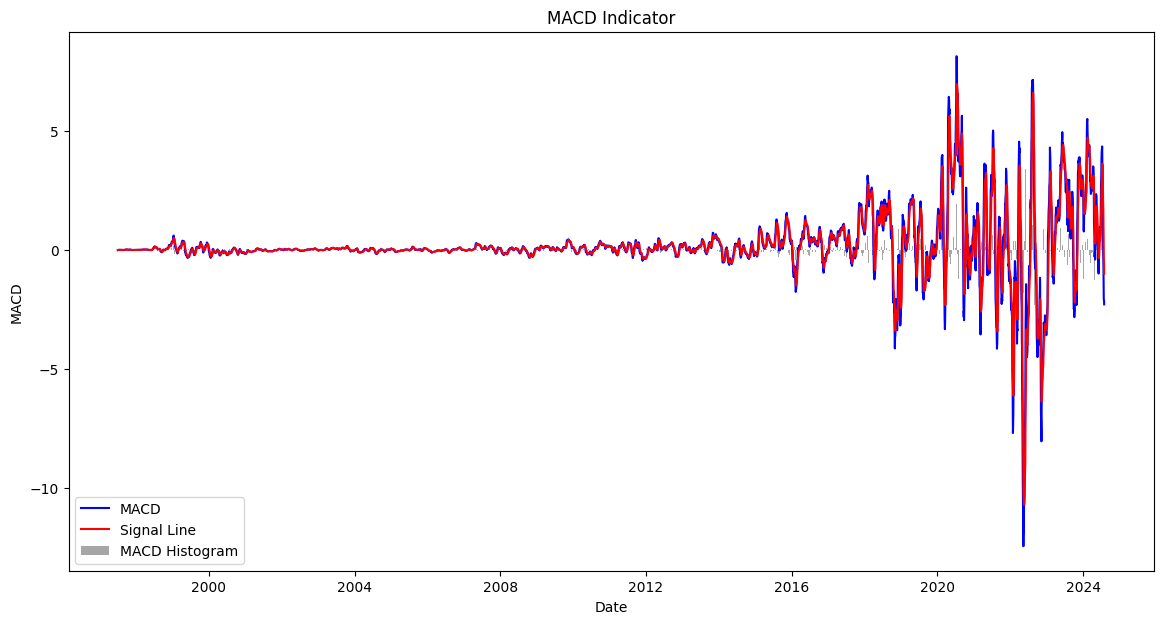

In [5]:
plt.figure(figsize=(14, 7))

# Plot MACD and Signal
plt.plot(stock_df['Date'], stock_df['MACD'], label='MACD', color='blue')
plt.plot(stock_df['Date'], stock_df['MACD_signal'], label='Signal Line', color='red')

# Plot MACD Histogram as bar chart
plt.bar(stock_df['Date'], stock_df['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD Indicator')
plt.legend()
plt.show()